In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import cmath

# data path
path_csi =  'J:\\Data\\Wi-Fi_processed\\'
path_csi_hc = 'J:\\Data\\Wi-Fi_HC\\180_100\\'

# data info
df_info = pd.read_csv('data_subc_sig_v1.csv')
#df_info = df_info[df_info.id_person < 50]
df_info = df_info[(df_info.id_location==1)  & (df_info.id_direction==1)]

person_uid = np.unique(df_info['id_person'])
dict_id = dict(zip(person_uid,np.arange(len(person_uid))))

# parameters
max_value = np.max(df_info['max'].values)
#no_classes = len(np.unique(df_info['id_person']))
no_classes = len(dict_id)
csi_time = int(np.max(df_info['len']))
csi_subc = 30
input_shape = (csi_time, csi_subc, 6)


C:\Users\herok\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# make data generator
def gen_csi(df_info,id_num,len_num):
    for file in np.unique(df_info.id.values):
        # read sample data
        # load and uncompress.
        with gzip.open(path_csi+file+'.pickle.gz','rb') as f:
            data1 = pickle.load(f)
        data1_diff = data1
        # zero pad
        pad_len = len_num - data1_diff.shape[0]
        data1_pad = np.pad(data1_diff,((0,pad_len),(0,0),(0,0),(0,0)),'constant',constant_values=0)

        # Label
        id_key = df_info[df_info.id==file]['id_person'].values[0].astype('int')
        data1_y = dict_id[id_key]

        yield(data1_pad ,data1_y)

In [3]:
gen = gen_csi(df_info,no_classes,csi_time)
# 3D scan
m,n = 2,3
#r = (160 + 160 + 164) * 0.01 # meter
r = 1.64 #meter
d = 45 * 0.01 # meter
lam = 300 / 2450 #wavelength = 300 / frequency in MHz
c =  299792458 # speed of light 
k = 0
t = 0

theta,sigma = 2*math.pi,2*math.pi
above_eq1 = 1j * (2*math.pi) * k * r * t / c
above_eq2 = 1j * (2*math.pi/lam) * math.sin(theta) * (n*d*math.cos(sigma) + m*d*math.sin(sigma))


In [4]:
np.unique(df_info.id.values)[0]

'S018_1_1_1'

In [5]:
target_sig,_ = next(gen)

In [6]:
target_sig.shape

(14958, 30, 2, 3)

In [7]:
def calc_p(target_sig,r,theta,sigma):
    sum_eq = np.complex(0)
    for i in range(m):
        for j in range(n):
            for t in range(csi_time):
                k = math.tan(np.angle(target_sig[t,i,j]))
                above_eq1 = 1j * (2*math.pi) * (t * 10 / csi_time) * r * k / c
                above_eq2 = 1j * (2*math.pi/lam) * math.sin(theta) * (n*d*math.cos(sigma) + m*d*math.sin(sigma))
                sum_eq += target_sig[t,i,j] * cmath.exp(above_eq1) *cmath.exp(above_eq2)
    return(np.abs(sum_eq))

In [8]:
    th_range,si_range = (20,20)
    sig_mat = np.zeros([1,th_range,si_range])
    subc = 0
    #for subc in range(30):
    for i in range(th_range):
        for j in range(si_range):
            theta = i * math.pi / th_range
            sigma = j * math.pi / si_range
            sig_mat[subc,i,j] = calc_p(target_sig[:,subc,:,:],r,theta,sigma)
            print((subc,i,j))

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 0, 5)
(0, 0, 6)
(0, 0, 7)
(0, 0, 8)
(0, 0, 9)
(0, 0, 10)
(0, 0, 11)
(0, 0, 12)
(0, 0, 13)
(0, 0, 14)
(0, 0, 15)
(0, 0, 16)
(0, 0, 17)
(0, 0, 18)
(0, 0, 19)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 1, 10)
(0, 1, 11)
(0, 1, 12)
(0, 1, 13)
(0, 1, 14)
(0, 1, 15)
(0, 1, 16)
(0, 1, 17)
(0, 1, 18)
(0, 1, 19)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 2, 11)
(0, 2, 12)
(0, 2, 13)
(0, 2, 14)
(0, 2, 15)
(0, 2, 16)
(0, 2, 17)
(0, 2, 18)
(0, 2, 19)
(0, 3, 0)
(0, 3, 1)
(0, 3, 2)
(0, 3, 3)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 3, 10)
(0, 3, 11)
(0, 3, 12)
(0, 3, 13)
(0, 3, 14)
(0, 3, 15)
(0, 3, 16)
(0, 3, 17)
(0, 3, 18)
(0, 3, 19)
(0, 4, 0)
(0, 4, 1)
(0, 4, 2)
(0, 4, 3)
(0, 4, 4)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(0, 4, 9)
(0, 4, 10)
(0, 4, 11)
(0, 4, 12)
(0, 4, 13)
(0, 4, 14)
(0, 4

In [9]:
sig_mat = sig_mat / np.median(sig_mat)

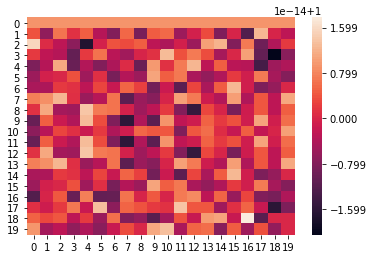

In [10]:
import seaborn as sns
ax = sns.heatmap(sig_mat[0,:th_range,:si_range])#,vmin=np.median(sig_mat))

In [11]:
sig_mat[0,16,18],sig_mat[0,18,16]

(0.9999999999999913, 1.0000000000000178)

In [12]:
sig_mat[0,0,0],sig_mat[0,0,15],sig_mat[0,0,19]

(1.0000000000000093, 1.0000000000000093, 1.0000000000000093)

In [13]:
sig_mat[0,0,0],sig_mat[0,15,0],sig_mat[0,19,0]

(1.0000000000000093, 0.9999999999999944, 1.0000000000000095)

In [14]:
sig_mat.shape

(1, 20, 20)

In [15]:
import skimage.measure

In [20]:
a =  skimage.measure.block_reduce(sig_mat, (1,2,2), np.mean) 

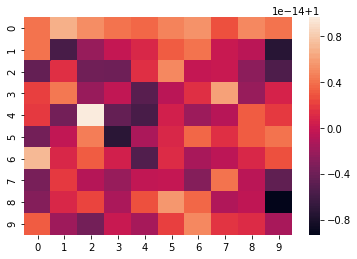

In [22]:
import seaborn as sns
ax = sns.heatmap(a[0,:th_range,:si_range])#,vmin=np.median(sig_mat))